1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
    - 1 building_windows_float_processed
    - 2 building_windows_non_float_processed
    - 3 vehicle_windows_float_processed
    - 4 vehicle_windows_non_float_processed (none in this database)
    - 5 containers
    - 6 tableware
    - 7 headlamps
    

Float Processed: silica sand (73%), calcium oxide (9%), soda (13%) and magnesium (4%)
Non_Float_Processed: 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


In [100]:
df = pd.read_csv(r"datasets\K_Means_glass.csv")


In [102]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [104]:
df.shape

(214, 10)

In [10]:
df.Type.value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [12]:
df.Type.value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [14]:
list(enumerate(df.columns[:-1]))

[(0, 'RI'),
 (1, 'Na'),
 (2, 'Mg'),
 (3, 'Al'),
 (4, 'Si'),
 (5, 'K'),
 (6, 'Ca'),
 (7, 'Ba'),
 (8, 'Fe')]

#### Since we are going for unsupervised. We are dropping Target column `Type`

In [17]:
df.drop('Type', axis=1, inplace=True)

In [19]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


### Create  'ID' columnm

- 1) It will help to identify which glass/observation belongs to which cluster
- 2) So indexs may get dropped with outlier treatment

In [23]:
df['ID'] = df.index+100

In [25]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,100
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,101
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,102
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,103
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,104


In [27]:
df.columns[:-1]

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

What are the  two important pre-processing steps for clustering?
- 1 Outlier treatment
- 2 Feature Scaling  


In [30]:
list(enumerate(df.columns[:-1]))


[(0, 'RI'),
 (1, 'Na'),
 (2, 'Mg'),
 (3, 'Al'),
 (4, 'Si'),
 (5, 'K'),
 (6, 'Ca'),
 (7, 'Ba'),
 (8, 'Fe')]

In [32]:
f = df.columns[:-1]

In [34]:
f

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

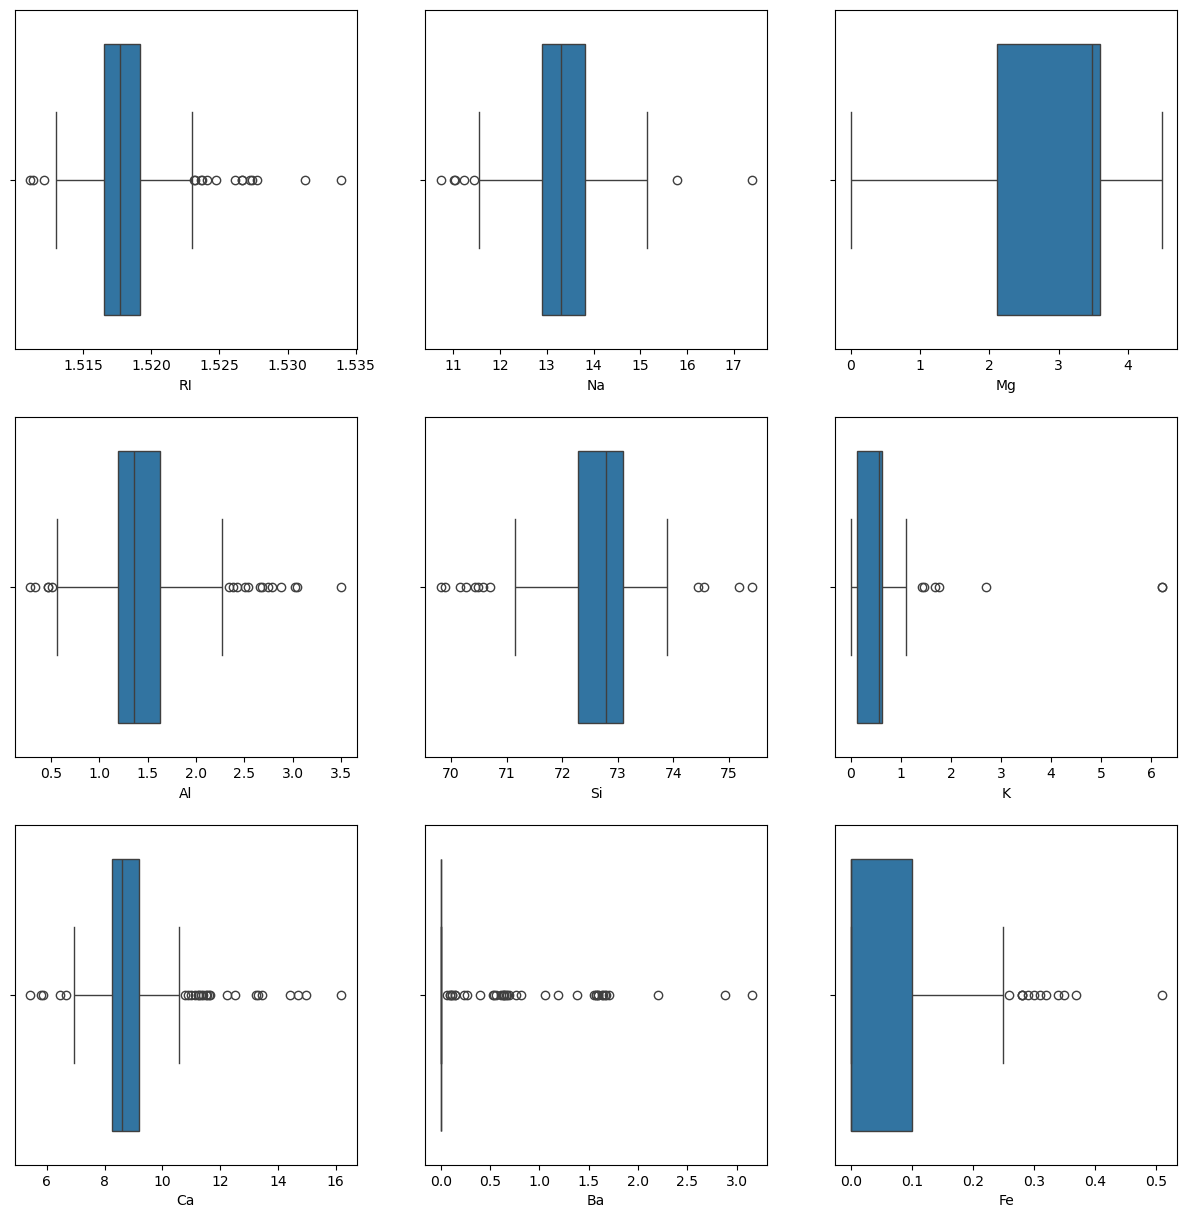

In [36]:
plt.figure(figsize=(15,15))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1])
    

### How to deal with outliers?

1. You may drop them.
    - When you have less outliers.
    - And you have good amount of data.
2. Capping.
    - We restrict the outliers at certain percentile.
    - Soft Capping: We use 1-99 as the percentile cutoff
        - I am least disturbing the data or I am least changing the data.
        - When you have less outliers and you don't have the option to drop, then you may use this capping range.
    - Hard Capping: We use 5-95 as the percentile cutoff
        - A lot of data will be getting changed.
        - We may use it if the column is having so may outliers and is the only column in the data with the outlier.
3. Doing Nothing
    - If all the columns/most of the columns are having outliers in a certain range(above or below), then we may ignore/leave them, because they may form a cluster of itself.
4. Transformation
    - We may also transform the data into new dimesnsions where I don't have any influence of the outliers and hence no treatment is required.
        - PCA
        - LOG
        - POWER

### Outliers

In [39]:
f 

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [40]:
for i in f:
    q1 = df[i].quantile(0.01)
    q4 = df[i].quantile(0.99)
    df[i][df[i]<q1] = q1
    df[i][df[i]>q4] = q4
    #df[i] = df[i].apply(lambda x:x if x <q1 else q1)
    #df[i] = df[i].apply(lambda x:x if x >q4 else q4)

C:\Users\Sowmya\AppData\Local\Temp\ipykernel_18608\3943076553.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[i][df[i]<q1] = q1
C:\Users\Sowmya\AppData\Local\Temp\ipykernel_18608\3943076553.py:4: SettingWithCopyWarning: 
A value is tr

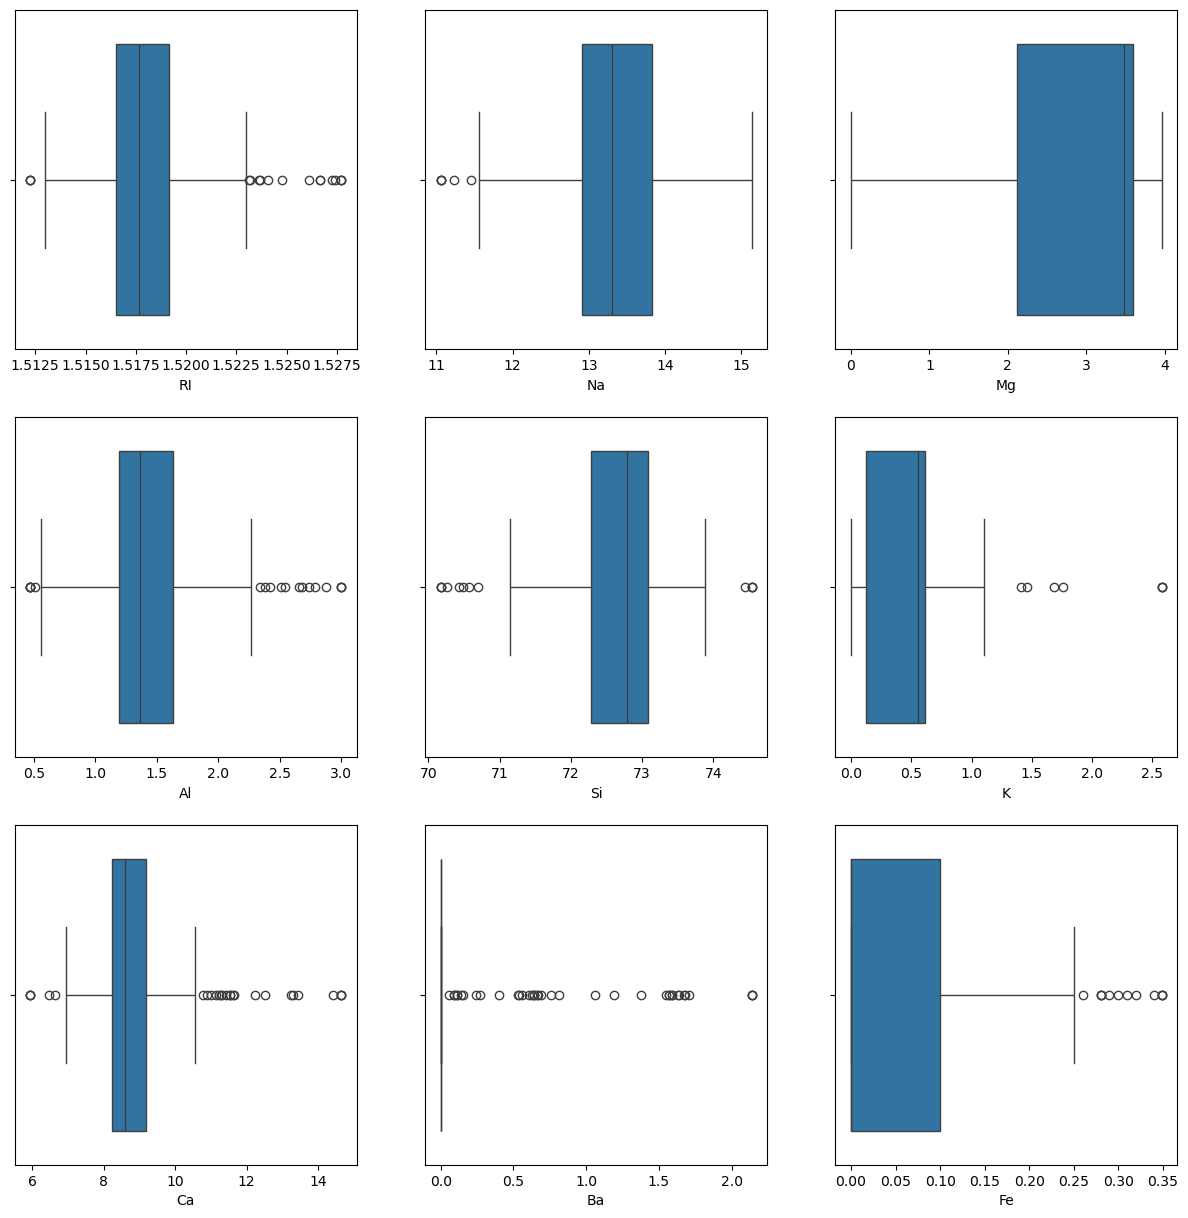

In [44]:
plt.figure(figsize=(15,15))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1])

### Scaling



#### Very important to keep all the columns intact in the same unit/scale because distance calulation can
#### get influenced because of different units for various columns and wihth in columns

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
0,1.52101,13.64,3.9648,1.10,71.78,0.06,8.75,0.0,0.0,100
1,1.51761,13.89,3.6000,1.36,72.73,0.48,7.83,0.0,0.0,101
2,1.51618,13.53,3.5500,1.54,72.99,0.39,7.78,0.0,0.0,102
3,1.51766,13.21,3.6900,1.29,72.61,0.57,8.22,0.0,0.0,103
4,1.51742,13.27,3.6200,1.24,73.08,0.55,8.07,0.0,0.0,104


In [52]:
ss = StandardScaler()
df_2 = ss.fit_transform(df.drop("ID", axis=1))

In [54]:
df_2 = pd.DataFrame(df_2)

In [56]:
df_2.columns = df.columns[:-1]
df_2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.950549,0.319899,0.893132,-0.707909,-1.170586,-1.021903,-0.147013,-0.367626,-0.597741
1,-0.255286,0.647661,0.639148,-0.172494,0.112257,0.044327,-0.817870,-0.367626,-0.597741
2,-0.762446,0.175684,0.604337,0.198179,0.463350,-0.184151,-0.854329,-0.367626,-0.597741
3,-0.237553,-0.243851,0.701809,-0.316644,-0.049787,0.272804,-0.533485,-0.367626,-0.597741
4,-0.322671,-0.165188,0.653073,-0.419608,0.584883,0.222032,-0.642864,-0.367626,-0.597741


### Steps For Clustering

- Preprocessing
    - Outlier Treatment
    - Scaling
- Check for Cluster Tendency: Here we will check if the data which we are using for clustering is actually having some clusters or not?
    - Hopkins Score
- Find the value of K
    - Business Logic
    - Silhouette
    - Elbow/SSD
- Run Final K-Means Algo
    - Use the value of K that was found out in the last step
- Cluster Profiling
    - Trying to make sense out of the cluster formed.
    - Finding the overall profile/property of the cluster formed
    

In [58]:
## Check the HOPKINS
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [59]:
hopkins(df_2)

0.8605680087927026

In [60]:
# Let's run K-Means with different value of  K to check SILHOUETTE SCORE

from sklearn.metrics import silhouette_score
sil = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k, random_state=0).fit(df_2)
    sil.append([k,silhouette_score(df_2, kmean.labels_) ])
   
    

C:\Users\Sowmya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sowmya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sowmya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sowmya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

In [61]:
sil

[[2, 0.29361597995840094],
 [3, 0.42250776394038647],
 [4, 0.4342093805273017],
 [5, 0.2945117157188541],
 [6, 0.3304285653823402],
 [7, 0.34125549130523997],
 [8, 0.33478745458175696],
 [9, 0.2238169746549652],
 [10, 0.2614581849556994]]

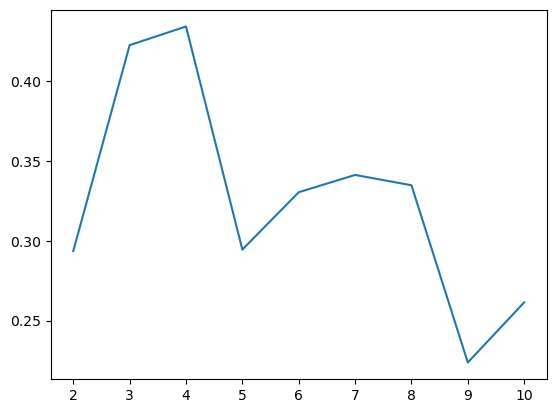

In [64]:
sil = pd.DataFrame(sil)
plt.plot(sil[0], sil[1])

### RULE FOR CHOOSING VALUE OF K

- Never go with k=2 as the option because it means you divide the complete data into two halfs and it's not useful for any business case.
- If you have option to choose between two values of K, always go with a lesser value.
- Since we will be taking business decisions based on the cluster result, it's awlays a good idea to go with a lower value of K so that it's easy to take and implement business decisions.
- Silhouette: That value of k for which the score is maximum
- Elbow, you look at the elbow of the curve

C:\Users\Sowmya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sowmya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sowmya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sowmya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

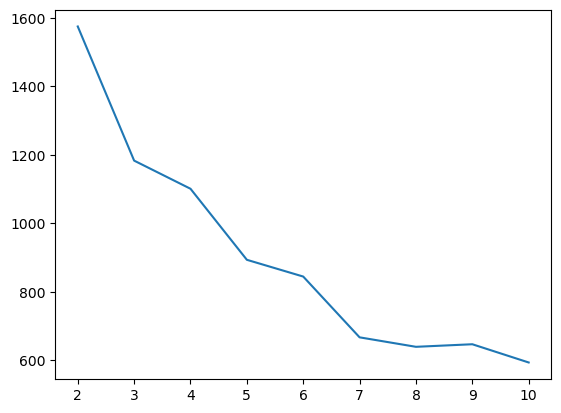

In [69]:
# Elbow
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df_2)
    ssd.append([k,kmean.inertia_])
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

In [70]:
KMeans()

KMeans()

In [72]:
## K=3 Final KMeans Analysis
kmean = KMeans(n_clusters=3, random_state=0)
kmean.fit(df_2)


C:\Users\Sowmya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [73]:
kmean.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [76]:
df['label'] = kmean.labels_

In [80]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID,label
0,1.52101,13.64,3.9648,1.10,71.78,0.06,8.75,0.0,0.0,100,2
1,1.51761,13.89,3.6000,1.36,72.73,0.48,7.83,0.0,0.0,101,2
2,1.51618,13.53,3.5500,1.54,72.99,0.39,7.78,0.0,0.0,102,2
3,1.51766,13.21,3.6900,1.29,72.61,0.57,8.22,0.0,0.0,103,2
4,1.51742,13.27,3.6200,1.24,73.08,0.55,8.07,0.0,0.0,104,2


### Cluster Profiling

Add the labels generated by the algo back to the original dataframe

In [83]:
df.label.value_counts()

label
2    159
0     33
1     22
Name: count, dtype: int64

In [85]:
df.groupby("label")[["K", "Ca", "Ba", "Fe"]].mean()

,K,Ca,Ba,Fe
label,,,,
0,0.369867,8.312545,0.956139,0.011818
1,0.247273,12.176400,0.097105,0.072727
2,0.511558,8.638050,0.012264,0.063057


### Check how many observations are clustered in each cluster?


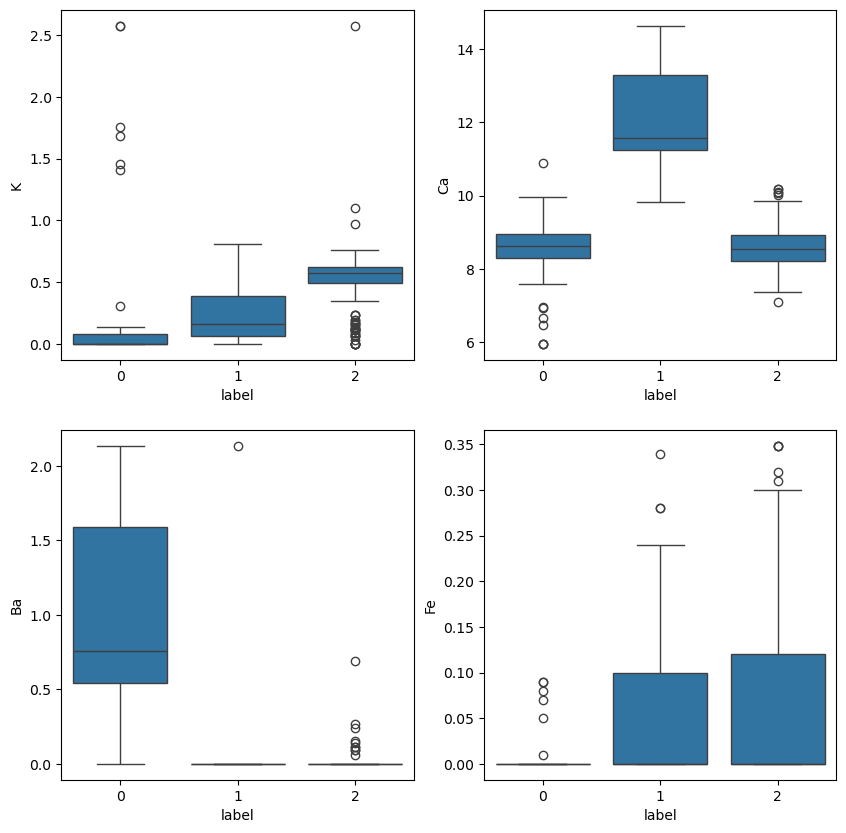

In [89]:
f = ["K", "Ca", "Ba", "Fe"]
plt.figure(figsize=(10,10))
for i in enumerate(f):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(data=df, x='label', y=i[1])

### Profile



0 : Consists rich `Fe` Glasses <br>
1 : Consists rich `Ba` Glasses <br>
2 : Consists rich `Ca` Glasses <br>

In [93]:
df[df['label'] == 1].ID

47     147
103    203
104    204
105    205
106    206
107    207
108    208
109    209
110    210
111    211
112    212
129    229
130    230
131    231
165    265
166    266
167    267
169    269
170    270
173    273
175    275
183    283
Name: ID, dtype: int64